In [39]:
from scipy import stats as st
from scipy.stats import chisquare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro

In [40]:
survey_raw = pd.read_csv("Raw_survey_data.csv")
survey_raw["dummy"] = [1]*1600
survey_raw = survey_raw.rename(columns = {'q4':'LOIF','q5':'LOIM','q8':'LOIT','q17':'House_Status','q18':'Household_Status','q19':'Grocery_Budget_Strictness','Age_Catagory':"Age Category"},errors="raise")


Statistics=0.980, p=0.536


Text(0.5, 1.0, 'Population distrubtion of Age Category')

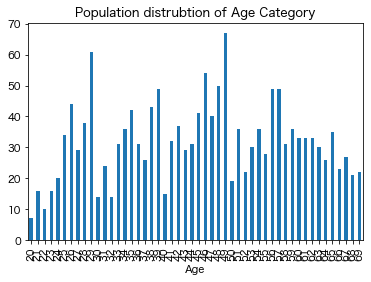

In [41]:
#--------------------------------------------------------------------------------#
#Before Running Anova, Test for normality                                        #  
#--------------------------------------------------------------------------------#
data = survey_raw.groupby("Age").count()
data = data["dummy"]
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
data.plot(kind = "bar")
plt.title("Population distrubtion of Age Category")

Statistics=0.892, p=0.327


Text(0.5, 1.0, 'Population distrubtion of Grocery_Budget_Strictness Category')

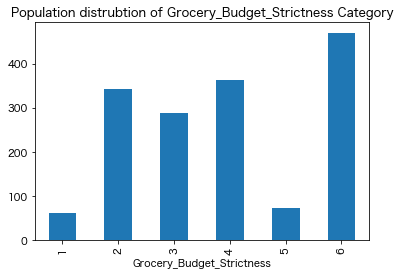

In [42]:
#--------------------------------------------------------------------------------#
#Before Running Anova, Test for normality                                                           #  
#--------------------------------------------------------------------------------#
data = survey_raw.groupby("Grocery_Budget_Strictness").count()
data = data["dummy"]
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
data.plot(kind = "bar")
plt.title("Population distrubtion of Grocery_Budget_Strictness Category")

Text(0.5, 1.0, 'Population distribution based on LOIM')

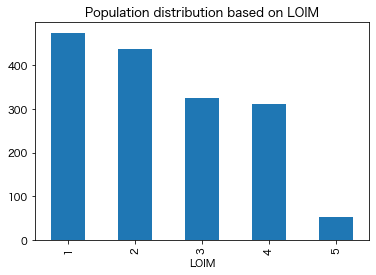

In [43]:
#--------------------------------------------------------------------------------#
#ANOVA ON Age Category and LOIT                                                           #  
#--------------------------------------------------------------------------------#
age_and_loit = survey_raw[{"LOIM","Age","dummy"}]
group_by_Age_Category = age_and_loit.groupby(["LOIM"]).count()
group_by_Age_Category["dummy"].plot(kind = "bar")
plt.title("Population distribution based on LOIM")

Text(0.5, 1.0, 'Population distribution based on LOIM')

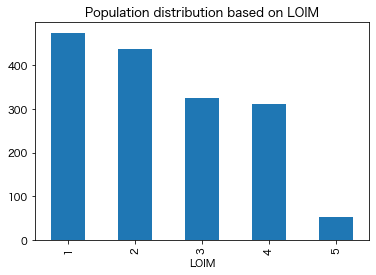

In [44]:
#--------------------------------------------------------------------------------#
#ANOVA ON Age Category and LOIT                                                           #  
#--------------------------------------------------------------------------------#
age_and_loit = survey_raw[{"LOIM","Age","dummy"}]
group_by_Age_Category = age_and_loit.groupby(["LOIM"]).count()
group_by_Age_Category["dummy"].plot(kind = "bar")
plt.title("Population distribution based on LOIM")

F_onewayResult(statistic=3.3484844950560966, pvalue=0.00970172043833915)


/Users/Bofan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.222,0.9,-2.6625,2.2184,False
1,3,-0.6657,0.9,-3.1513,1.8199,False
1,4,-1.1725,0.716,-3.8085,1.4634,False
1,5,-7.1595,0.0039,-12.6972,-1.6218,True
2,3,-0.4437,0.9,-2.9937,2.1063,False
2,4,-0.9505,0.859,-3.6473,1.7463,False
2,5,-6.9374,0.0061,-12.5044,-1.3705,True
3,4,-0.5068,0.9,-3.2446,2.2309,False
3,5,-6.4938,0.0133,-12.0806,-0.9069,True
4,5,-5.987,0.0318,-11.6423,-0.3316,True


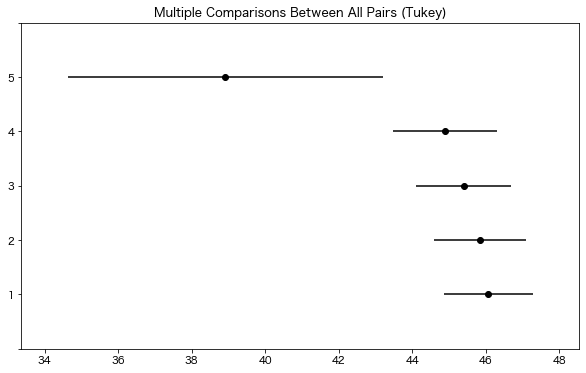

In [45]:
#--------------------------------------------------------------------------------#
#ANOVA ON Age and LOIT                                                          #  
#--------------------------------------------------------------------------------#
age_and_loit = survey_raw[{"LOIT","Age"}]
group_by_Age_Category = age_and_loit.groupby("LOIT")
groups = []
lotmlabel = []
ages = []

for i in range(1,6):
    for each in group_by_Age_Category.get_group(i)["Age"]:
        ages.append(each)
        lotmlabel.append(i)
    groups.append(group_by_Age_Category.get_group(i)["Age"])
print(st.f_oneway(*groups))
#Post-HOC
tukey = pairwise_tukeyhsd(endog = ages,
                        groups = lotmlabel,
                         alpha = 0.05)

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=60,ymin=-0.5,ymax=4.5, color="red")
plt

tukey.summary()

F_onewayResult(statistic=17.23907603517617, pvalue=7.465823186310686e-14)


/Users/Bofan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.4911,0.001,-0.7854,-0.1968,True
1,3,-0.6058,0.001,-0.9056,-0.306,True
1,4,-0.6829,0.001,-1.0008,-0.365,True
1,5,-1.5278,0.001,-2.1956,-0.8599,True
2,3,-0.1147,0.8272,-0.4222,0.1928,False
2,4,-0.1918,0.4911,-0.517,0.1335,False
2,5,-1.0367,0.001,-1.708,-0.3653,True
3,4,-0.0771,0.9,-0.4072,0.2531,False
3,5,-0.9219,0.0018,-1.5957,-0.2482,True
4,5,-0.8449,0.0066,-1.5269,-0.1628,True


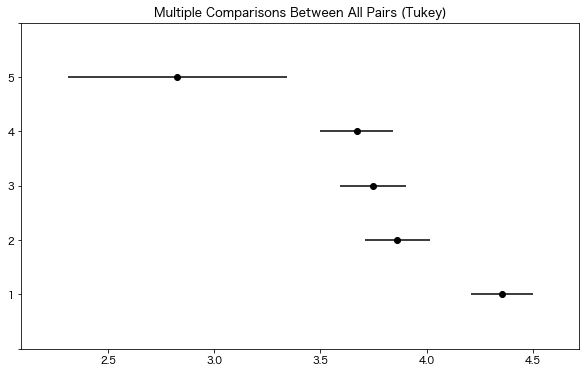

In [46]:
#--------------------------------------------------------------------------------#
#ANOVA ON GBS and LOIT                                                          #  
#--------------------------------------------------------------------------------#
age_and_loit = survey_raw[{"LOIT","Grocery_Budget_Strictness"}]
group_by_Age_Category = age_and_loit.groupby("LOIT")
groups = []
lotmlabel = []
ages = []

for i in range(1,6):
    for each in group_by_Age_Category.get_group(i)["Grocery_Budget_Strictness"]:
        ages.append(each)
        lotmlabel.append(i)
    groups.append(group_by_Age_Category.get_group(i)["Grocery_Budget_Strictness"])
print(st.f_oneway(*groups))
#Post-HOC
tukey = pairwise_tukeyhsd(endog = ages,
                        groups = lotmlabel,
                         alpha = 0.05)

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=60,ymin=-0.5,ymax=4.5, color="red")
plt

tukey.summary()

F_onewayResult(statistic=16.946511780645526, pvalue=1.2877555491218313e-13)


/Users/Bofan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.5613,0.001,-0.8475,-0.2751,True
1,3,-0.5557,0.001,-0.8667,-0.2448,True
1,4,-0.7714,0.001,-1.0869,-0.456,True
1,5,-1.2329,0.001,-1.8583,-0.6075,True
2,3,0.0056,0.9,-0.3106,0.3217,False
2,4,-0.2101,0.3807,-0.5306,0.1104,False
2,5,-0.6716,0.0292,-1.2996,-0.0436,True
3,4,-0.2157,0.4247,-0.5585,0.1271,False
3,5,-0.6772,0.0318,-1.3168,-0.0375,True
4,5,-0.4615,0.2846,-1.1033,0.1804,False


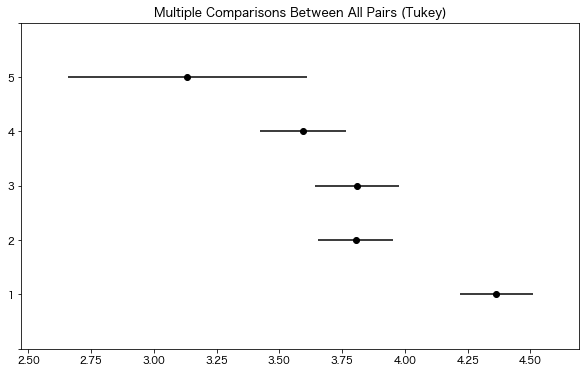

In [47]:
#--------------------------------------------------------------------------------#
#ANOVA ON GBS and LOIM                                                           #  
#--------------------------------------------------------------------------------#
age_and_loit = survey_raw[{"LOIM","Grocery_Budget_Strictness"}]
group_by_Age_Category = age_and_loit.groupby("LOIM")
groups = []
lotmlabel = []
ages = []

for i in range(1,6):
    for each in group_by_Age_Category.get_group(i)["Grocery_Budget_Strictness"]:
        ages.append(each)
        lotmlabel.append(i)
    groups.append(group_by_Age_Category.get_group(i)["Grocery_Budget_Strictness"])
print(st.f_oneway(*groups))
#Post-HOC
tukey = pairwise_tukeyhsd(endog = ages,
                        groups = lotmlabel,
                         alpha = 0.05)

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=60,ymin=-0.5,ymax=4.5, color="red")
plt

tukey.summary()

In [38]:
group_by_Age_Category.get_group

F_onewayResult(statistic=1.2752895522191952, pvalue=0.27756749003677844)


/Users/Bofan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,1.0671,0.7869,-1.607,3.7411,False
1,3,-0.6458,0.9,-3.568,2.2765,False
1,4,0.288,0.9,-2.2631,2.839,False
1,5,2.2083,0.554,-1.811,6.2277,False
2,3,-1.7128,0.4586,-4.5251,1.0995,False
2,4,-0.7791,0.9,-3.2035,1.6453,False
2,5,1.1413,0.9,-2.7988,5.0814,False
3,4,0.9337,0.8684,-1.7619,3.6294,False
3,5,2.8541,0.3202,-1.2585,6.9667,False
4,5,1.9204,0.6339,-1.9373,5.7781,False


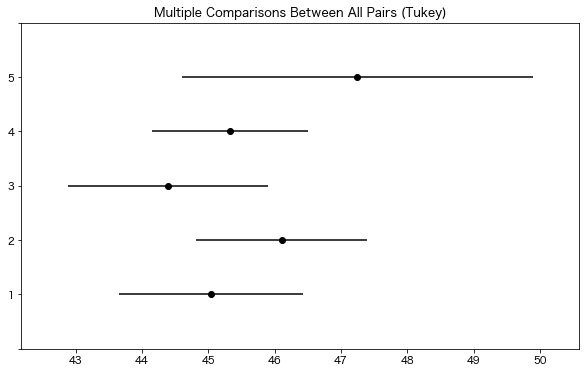

In [18]:
#--------------------------------------------------------------------------------#
#ANOVA ON Age and LOIF                                                           #  
#--------------------------------------------------------------------------------#
age_and_loit = survey_raw[{"LOIF","Age"}]
group_by_Age_Category = age_and_loit.groupby("LOIF")
groups = []
lotmlabel = []
ages = []

for i in range(1,6):
    for each in group_by_Age_Category.get_group(i)["Age"]:
        ages.append(each)
        lotmlabel.append(i)
    groups.append(group_by_Age_Category.get_group(i)["Age"])
print(st.f_oneway(*groups))
#Post-HOC
tukey = pairwise_tukeyhsd(endog = ages,
                        groups = lotmlabel,
                         alpha = 0.05)

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=60,ymin=-0.5,ymax=4.5, color="red")
plt

tukey.summary()

F_onewayResult(statistic=3.39267497537925, pvalue=0.00898873548291725)


/Users/Bofan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.8886,0.8248,-3.2607,1.4836,False
1,3,-0.8796,0.8764,-3.4572,1.698,False
1,4,-3.0232,0.014,-5.6375,-0.4089,True
1,5,-4.4082,0.1381,-9.5921,0.7756,False
2,3,0.009,0.9,-2.6114,2.6293,False
2,4,-2.1347,0.1821,-4.7911,0.5218,False
2,5,-3.5197,0.3474,-8.7249,1.6855,False
3,4,-2.1436,0.2379,-4.985,0.6978,False
3,5,-3.5287,0.3644,-8.8306,1.7733,False
4,5,-1.385,0.9,-6.705,3.9349,False


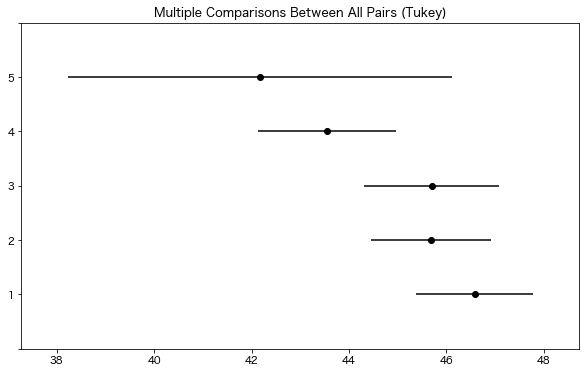

In [36]:
#--------------------------------------------------------------------------------#
#ANOVA ON Age Category and LOIM                                                           #  
#--------------------------------------------------------------------------------#
age_and_loit = survey_raw[{"LOIM","Age"}]
group_by_Age_Category = age_and_loit.groupby("LOIM")
groups = []
lotmlabel = []
ages = []

for i in range(1,6):
    for each in group_by_Age_Category.get_group(i)["Age"]:
        ages.append(each)
        lotmlabel.append(i)
    groups.append(group_by_Age_Category.get_group(i)["Age"])
print(st.f_oneway(*groups))
#Post-HOC
tukey = pairwise_tukeyhsd(endog = ages,
                        groups = lotmlabel,
                         alpha = 0.05)

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=60,ymin=-0.5,ymax=4.5, color="red")
plt

tukey.summary()

In [37]:
#--------------------------------------------------------------------------------#
#ANOVA ON Age Category and LOIM                                                           #  
#--------------------------------------------------------------------------------#
age_and_loit = survey_raw[{"LOIM","Age","Married"}]
group_by_Age_Category = age_and_loit.groupby("LOIM")

# groups = []
# lotmlabel = []
# ages = []

# for i in range(1,6):
#     for each in group_by_Age_Category.get_group(i)["Age"]:
#         ages.append(each)
#         lotmlabel.append(i)
#     groups.append(group_by_Age_Category.get_group(i)["Age"])
# print(st.f_oneway(*groups))
# #Post-HOC
# tukey = pairwise_tukeyhsd(endog = ages,
#                         groups = lotmlabel,
#                          alpha = 0.05)

# tukey.plot_simultaneous()    # Plot group confidence intervals
# plt.vlines(x=60,ymin=-0.5,ymax=4.5, color="red")
# plt

# tukey.summary()